In [63]:
# Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.model_selection as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
%matplotlib inline

In [64]:
df = pd.read_csv(r"C:\Users\sarad\Downloads\Shopping_Revenue.csv")
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [66]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [67]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [68]:
# Checking for null values
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [69]:
# Imputing null values with Mean
df = df.fillna(df.mean())

C:\Users\sarad\AppData\Local\Temp\ipykernel_10444\3351962089.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [70]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [71]:
df['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [72]:
df['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

In [73]:
df.drop(df[['Open Date','Id','P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']],axis=1,inplace=True)

In [74]:
df.head()

,City,City Group,Type,revenue
0,İstanbul,Big Cities,IL,5653753
1,Ankara,Big Cities,FC,6923131
2,Diyarbakır,Other,IL,2055379
3,Tokat,Other,IL,2675511
4,Gaziantep,Other,IL,4316715


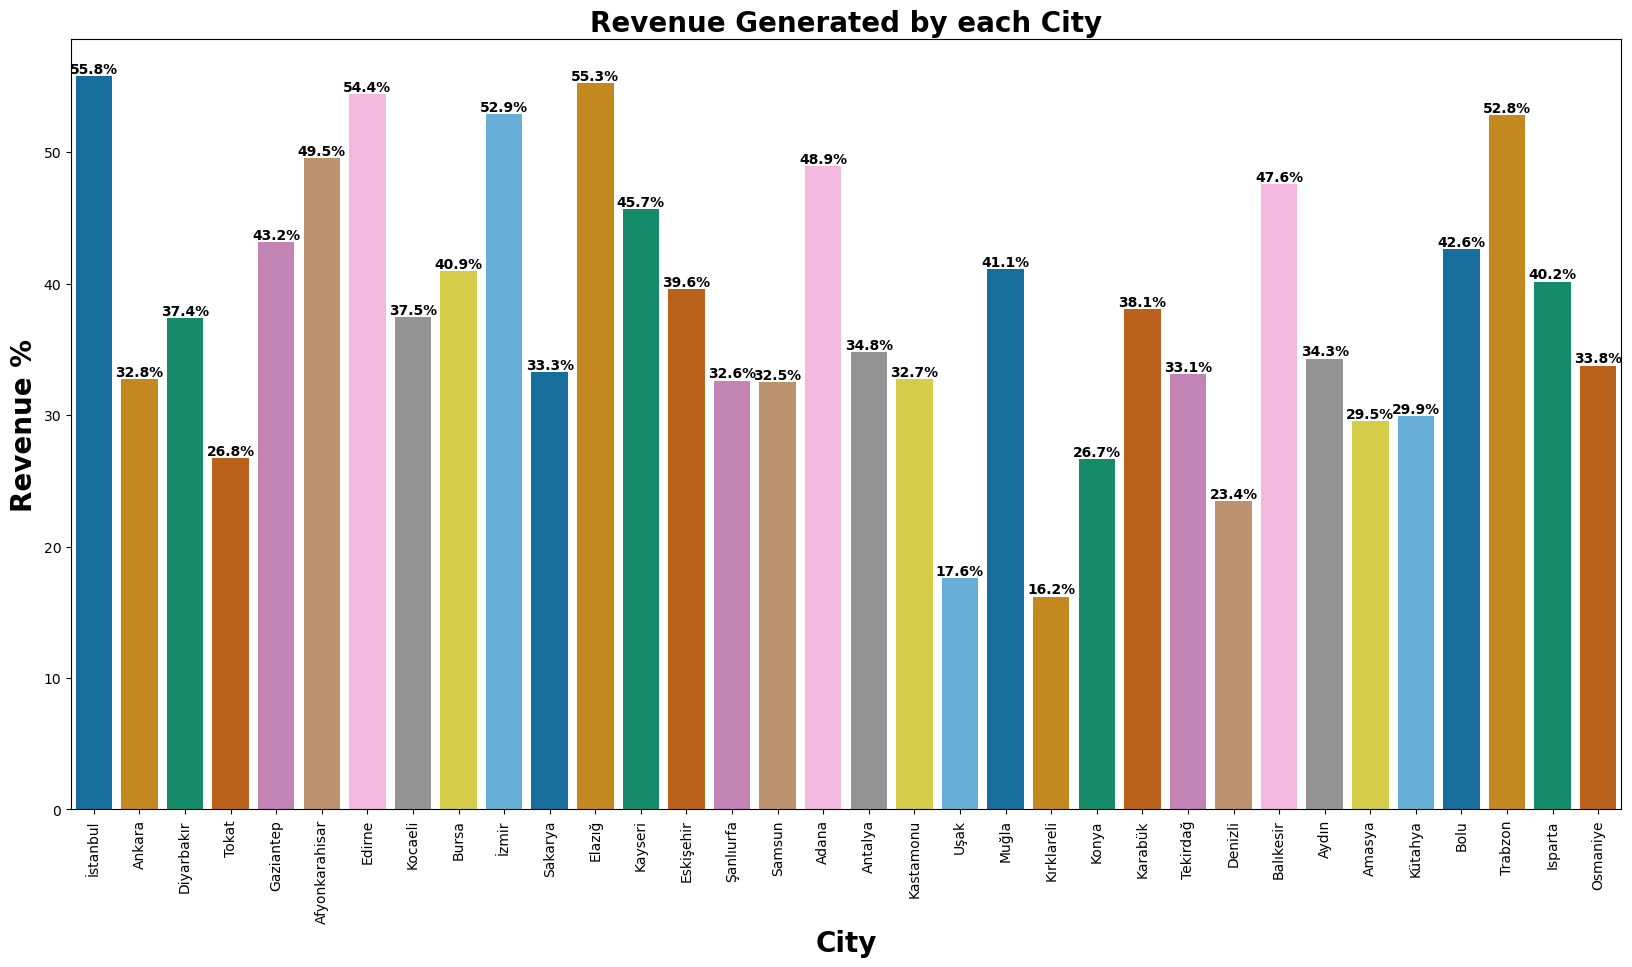

In [75]:
ref_val = 10000000  
df['rev_perct'] = ((df['revenue'] / ref_val) *100)
plt.figure(figsize=(20,10))
rev = sns.barplot(x= df["City"], y= df['rev_perct'], palette= "colorblind", errorbar= None)
plt.title('Revenue Generated by each City', fontsize= 20, fontweight= "bold")
plt.xlabel("City", fontsize= 20, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 20, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")
plt.xticks(rotation=90)
plt.show()

In [76]:
# From the above plot we can say that Istanbul is generating more revenue followed by Edime
# The least performing city is Kirklareli with 16.2%

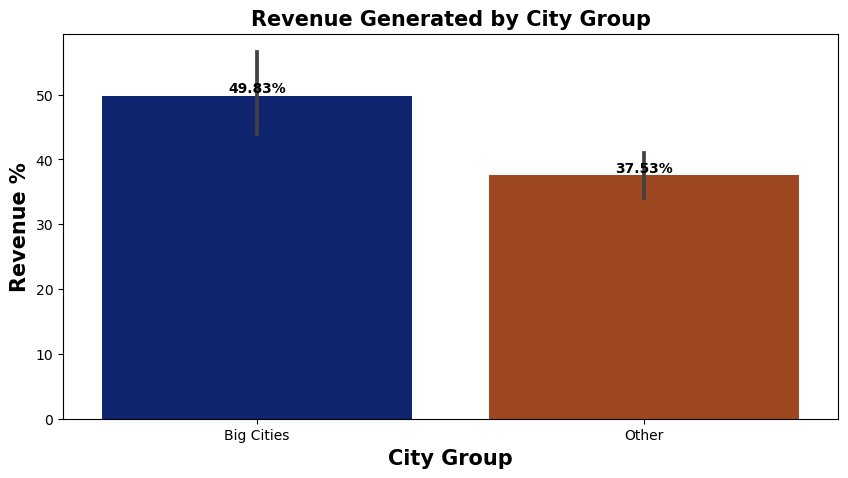

In [77]:
plt.figure(figsize=(10,5))
rev = sns.barplot(x= df["City Group"], y= df['rev_perct'], palette= "dark")
plt.title('Revenue Generated by City Group', fontsize= 15, fontweight= "bold")
plt.xlabel("City Group", fontsize= 15, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 15, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.2f%%', fontweight= "bold")
plt.xticks(rotation=0)
plt.show()

In [81]:
# The above plot says that revenue generated by Big Cities is greater than all other cities 

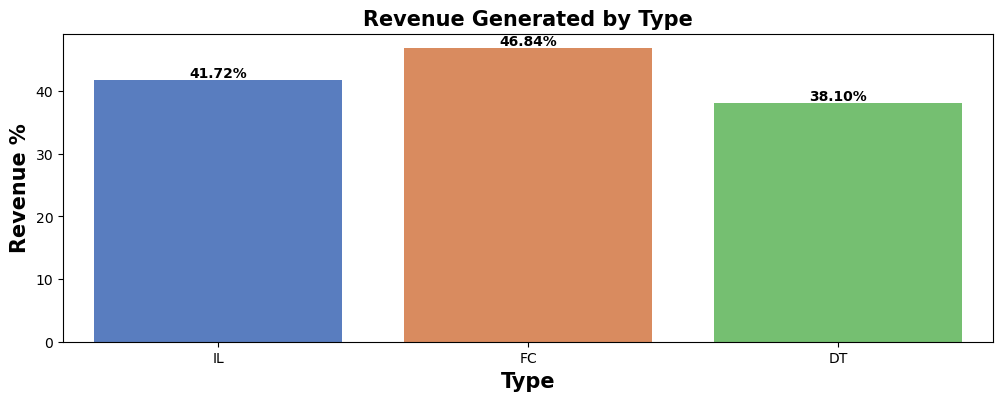

In [82]:
plt.figure(figsize=(12,4))
rev = sns.barplot(x= df["Type"], y= df['rev_perct'], palette= "muted", errorbar= None)
plt.title('Revenue Generated by Type', fontsize= 15, fontweight= "bold")
plt.xlabel("Type", fontsize= 15, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 15, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.2f%%', fontweight= "bold")
plt.xticks(rotation=0)
plt.show()

In [83]:
# The above plot says that Revenue generated by FC Type is greater followed by IL and DT

In [79]:
#ENCODING CITY COLUMN
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])

In [80]:
df

,City,City Group,Type,revenue,rev_perct
0,31,Big Cities,IL,5653753,56.53753
1,3,Big Cities,FC,6923131,69.23131
2,10,Other,IL,2055379,20.55379
3,28,Other,IL,2675511,26.75511
4,14,Other,IL,4316715,43.16715
...,...,...,...,...,...
132,29,Other,FC,5787594,57.87594
133,32,Big Cities,FC,9262754,92.62754
134,18,Other,FC,2544857,25.44857
135,31,Big Cities,FC,7217634,72.17634


In [18]:
x = df["City"]
y = df["revenue"]
x = x.values.reshape(-1,1)

In [19]:
x_train, x_test, y_train, y_test = ms.train_test_split(x,y,train_size= 0.8,test_size=0.2, random_state= 2)

In [20]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
li_reg_mdl = sm.OLS(y_train, x_train_sm).fit()
li_reg_mdl.params

const    3.506598e+06
x1       4.711336e+04
dtype: float64

In [21]:
li_reg_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5.060
Date:                Mon, 18 Sep 2023   Prob (F-statistic):             0.0265
Time:                        11:40:12   Log-Likelihood:                -1762.6
No. Observations:                 109   AIC:                             3529.
Df Residuals:                     107   BIC:                             3535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.507e+06   5.02e+05      6.990      0.000    2.51e+06     4.5e+06
x1          4.711e+04   2.09e+04      2.250      0.027    5594.862    8.86e+04
==============================================================================
Omnibus:                       88.985   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.073
Skew:                           2.686   Prob(JB):                    4.46e-167
Kurtosis:                      14.824   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_train_pred = li_reg_mdl.predict(x_train_sm)
errors = (y_train - y_train_pred)
errors

78     2.234057e+05
126   -1.975497e+05
11     1.942576e+05
130   -1.261174e+06
48     2.847145e+06
           ...     
75     1.158195e+07
43    -9.152933e+05
22    -3.985527e+05
72    -2.488851e+06
15    -1.748194e+06
Name: revenue, Length: 109, dtype: float64

C:\Users\sarad\AppData\Local\Temp\ipykernel_10444\909450435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, bins=20)


<Axes: xlabel='revenue', ylabel='Density'>

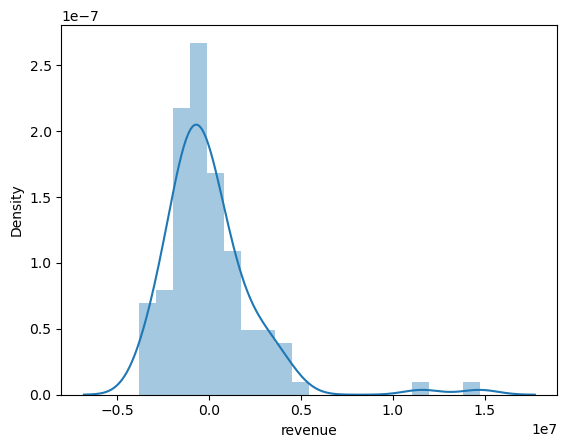

In [24]:
fig = plt.figure()
sns.distplot(errors, bins=20)

In [25]:
x_test_sm = sm.add_constant(x_test)
y_preds = li_reg_mdl.predict(x_test_sm)
y_preds

array([3742165.066547  , 4590205.53932594, 4967112.41611657,
       3647938.34734935, 3695051.70694818, 4825772.33732008,
       4967112.41611657, 4495978.82012828, 3647938.34734935,
       4967112.41611657, 4967112.41611657, 4967112.41611657,
       4967112.41611657, 3977731.86454115, 4119071.94333764,
       3930618.50494232, 4967112.41611657, 3600824.98775052,
       3883505.14534349, 4967112.41611657, 4967112.41611657,
       4731545.61812242, 4967112.41611657, 4967112.41611657,
       4778658.97772125, 3647938.34734935, 4590205.53932594,
       3647938.34734935])

In [34]:
np.sqrt(mean_squared_error(y_test, y_preds))
r_score = r2_score(y_test, y_preds)
r_score

0.17135902491374533

In [27]:
# The above shows Linear Regression SCore

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(random_state= 20)
rf_classifier.fit(x_train_sm, y_train)

RandomForestClassifier(random_state=20)

In [36]:
y_pred1 = rf_classifier.predict(x_test_sm)
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.0

In [30]:
# Accuracy Score of RandomForestClassifier is 0

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_sm)
x_test = scaler.transform(x_test_sm)
x_train = pd.DataFrame(x_train_sm)
x_test = pd.DataFrame(x_test_sm)
x_train.describe()

,0,1
count,109.0,109.000000
mean,1.0,20.862385
std,0.0,11.823915
min,1.0,0.000000
25%,1.0,8.000000
50%,1.0,26.000000
75%,1.0,31.000000
max,1.0,33.000000


In [43]:
svm_cls = SVC(kernel='linear', random_state= 2)
svm_cls.fit(x_train_sm, y_train)
y_pred2 = svm_cls.predict(x_test_sm)
svm_accuracy = accuracy_score(y_test, y_pred2)
svm_accuracy

0.0

In [44]:
# Accuracy score of Support Vector Classifier is 0

In [47]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(x_train_sm,y_train)
y_pred3 = Log_reg.predict(x_test_sm)

C:\Users\sarad\Anac py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
log_accuracy = accuracy_score(y_test,y_pred3)
log_accuracy

0.0

In [49]:
# Accuracy score of Logistic Regression is 0

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso()

In [52]:
lasso.fit(x_train, y_train)

Lasso()

In [53]:
lasso001 = Lasso(alpha = 0.01)

In [54]:
lasso001.fit(x_train, y_train)

Lasso(alpha=0.01)

In [55]:
lasso10 = Lasso(alpha = 10)

In [56]:
lasso10.fit(x_train, y_train)

Lasso(alpha=10)

In [57]:
lasso_train_score = lasso.score(x_train, y_train)

In [58]:
print(lasso_train_score )

0.04515732644102588


In [59]:
lasso_test_score = lasso.score(x_test, y_test)

In [60]:
print(lasso_test_score )

0.17135900615157307


In [61]:
# Here the score of Lasso model is 1.71

# From the above predictions both Lasso model and Linear Regression model are performing same and better than RandomForestClassifier, LogisticRegression and SVM.